# Анализ тарифов компании «Мегалайн»

   ***Источник данных*** :

«Мегалайн» — федерального оператора сотовой связи.

Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». 

Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.

   ***Цель исследования***:

Предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов.

В нашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год.

Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

**Описание тарифов**

**Тариф «Смарт»**

Ежемесячная плата: 550 рублей
Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
Стоимость услуг сверх тарифного пакета: 1. минута разговора: 3 рубля («Мегалайн» всегда округляет вверх значения минут и мегабайтов. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута); 2. сообщение: 3 рубля; 3. 1 Гб интернет-трафика: 200 рублей.

**Тариф «Ультра»**

Ежемесячная плата: 1950 рублей
Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
Стоимость услуг сверх тарифного пакета: 1. минута разговора: 1 рубль; 2. сообщение: 1 рубль; 3. 1 Гб интернет-трафика: 150 рублей.

***Примечание***

«Мегалайн» всегда округляет секунды до минут, а мегабайты — до гигабайт. Каждый звонок округляется отдельно: даже если он длился всего 1 секунду, будет засчитан как 1 минута.

Для веб-трафика отдельные сессии не считаются. Вместо этого общая сумма за месяц округляется в бо́льшую сторону. Если абонент использует 1025 мегабайт в этом месяце, с него возьмут плату за 2 гигабайта.

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных-,-изучение-общей-информации" data-toc-modified-id="Загрузка-данных-,-изучение-общей-информации-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных , изучение общей информации</a></span><ul class="toc-item"><li><span><a href="#Описание-данных-таблица-users-(информация-о-пользователях)" data-toc-modified-id="Описание-данных-таблица-users-(информация-о-пользователях)-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Описание данных таблица users (информация о пользователях)</a></span></li><li><span><a href="#Описание-данных-таблица-calls--(информация-о-звонках)" data-toc-modified-id="Описание-данных-таблица-calls--(информация-о-звонках)-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Описание данных таблица calls  (информация о звонках)</a></span></li><li><span><a href="#Описание-данных-таблица-messages-(информация-о-сообщениях)" data-toc-modified-id="Описание-данных-таблица-messages-(информация-о-сообщениях)-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Описание данных таблица messages (информация о сообщениях)</a></span></li><li><span><a href="#Описание-данных-таблица-internet-(информация-об-интернет-сессиях)" data-toc-modified-id="Описание-данных-таблица-internet-(информация-об-интернет-сессиях)-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Описание данных таблица internet (информация об интернет-сессиях)</a></span></li><li><span><a href="#Описание-данных-таблица-tariffs-(информация-о-тарифах)" data-toc-modified-id="Описание-данных-таблица-tariffs-(информация-о-тарифах)-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Описание данных таблица tariffs (информация о тарифах)</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных-и-замена-типа-данных" data-toc-modified-id="Предобработка-данных-и-замена-типа-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных и замена типа данных</a></span></li><li><span><a href="#Расчеты-и-добавления-результатов-в-таблицу" data-toc-modified-id="Расчеты-и-добавления-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчеты и добавления результатов в таблицу</a></span><ul class="toc-item"><li><span><a href="#Количество-сделанных-звонков-и-израсходованных-минут-разговора-по-месяцам" data-toc-modified-id="Количество-сделанных-звонков-и-израсходованных-минут-разговора-по-месяцам-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Количество сделанных звонков и израсходованных минут разговора по месяцам</a></span></li><li><span><a href="#Количество-отправленных-сообщений-по-месяцам" data-toc-modified-id="Количество-отправленных-сообщений-по-месяцам-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Количество отправленных сообщений по месяцам</a></span></li><li><span><a href="#Объем-израсходованного-интернет-трафика-по-месяцам" data-toc-modified-id="Объем-израсходованного-интернет-трафика-по-месяцам-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Объем израсходованного интернет-трафика по месяцам</a></span></li><li><span><a href="#Помесячную-выручку-с-каждого-пользователя" data-toc-modified-id="Помесячную-выручку-с-каждого-пользователя-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Помесячную выручку с каждого пользователя</a></span></li></ul></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Звонки-в-месяц-по-тарифу-Ultra,-Smart" data-toc-modified-id="Звонки-в-месяц-по-тарифу-Ultra,-Smart-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Звонки в месяц по тарифу Ultra, Smart</a></span></li><li><span><a href="#Cообщения-в-месяц-по-тарифу-Ultra,-Smart" data-toc-modified-id="Cообщения-в-месяц-по-тарифу-Ultra,-Smart-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Cообщения в месяц по тарифу Ultra, Smart</a></span></li><li><span><a href="#Интернет-в-месяц-Гб-по-тарифу-Ultra,-Smart" data-toc-modified-id="Интернет-в-месяц-Гб-по-тарифу-Ultra,-Smart-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Интернет в месяц Гб по тарифу Ultra, Smart</a></span></li></ul></li><li><span><a href="#Проверка-гипотез" data-toc-modified-id="Проверка-гипотез-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Проверка гипотез</a></span><ul class="toc-item"><li><span><a href="#Гипотеза:-средняя-выручка-пользователей-из-Москвы-не-отличается-от-выручки-пользователей-из-других-регионов" data-toc-modified-id="Гипотеза:-средняя-выручка-пользователей-из-Москвы-не-отличается-от-выручки-пользователей-из-других-регионов-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Гипотеза: средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Общий вывод</a></span><ul class="toc-item"><li><span><a href="#Чек-лист" data-toc-modified-id="Чек-лист-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Чек лист</a></span></li></ul></li></ul></div>

## Загрузка данных , изучение общей информации

In [1]:
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable


In [1]:
# импорт всех необходимых библиотек

import pandas as pd

import numpy as np

from scipy import stats as st

import seaborn as sns


In [2]:
try:
    df_calls=pd.read_csv('https://code.s3.yandex.net/datasets/calls.csv')
    df_internet=pd.read_csv('https://code.s3.yandex.net/datasets/internet.csv')
    df_messages=pd.read_csv('https://code.s3.yandex.net/datasets/messages.csv')
    df_tariffs=pd.read_csv('https://code.s3.yandex.net/datasets/tariffs.csv')
    df_users=pd.read_csv('https://code.s3.yandex.net/datasets/users.csv') 
except:
    df_calls=pd.read_csv('C://Users//Вика//Downloads//calls.csv')
    df_internet=pd.read_csv('C://Users//Вика//Downloads//internet.csv')
    df_messages=pd.read_csv('C://Users//Вика//Downloads//messages.csv')
    df_tariffs=pd.read_csv('C://Users//Вика//Downloads//tariffs.csv')
    df_users=pd.read_csv('C://Users//Вика//Downloads//users.csv')


### Описание данных таблица users (информация о пользователях)

Таблица users (информация о пользователях):

user_id — уникальный идентификатор пользователя

first_name — имя пользователя

last_name — фамилия пользователя

age — возраст пользователя (годы)

reg_date — дата подключения тарифа (день, месяц, год)

churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)

city — город проживания пользователя

tarif — название тарифного плана

____________________________________________________________________________________________________________________________

In [3]:
df_users.info()   #общая инфомация о датасете, типы данных, количество строк и столбцов, наличие пропущенных значений 
display(df_users)
df_users.describe().T   # данные по статистическим показателям

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
...,...,...,...,...,...,...,...,...
495,1495,65,NaN,Иркутск,Авксентий,Фокин,2018-08-28,ultra
496,1496,36,NaN,Вологда,Трифон,Блохин,2018-01-27,smart
497,1497,32,NaN,Челябинск,Каролина,Агеева,2018-10-09,smart
498,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart


,count,mean,std,min,25%,50%,75%,max
user_id,500.0,1249.500,144.481833,1000.0,1124.75,1249.5,1374.25,1499.0
age,500.0,46.588,16.667630,18.0,32.00,46.0,62.00,75.0


### Описание данных таблица calls  (информация о звонках)

id — уникальный номер звонка

call_date — дата звонка

duration — длительность звонка в минутах

user_id — идентификатор пользователя, сделавшего звонок
___________________________________________________________________________________________________________________________

In [4]:
df_calls.info() 
display(df_calls)
df_calls.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
...,...,...,...,...
202602,1499_215,2018-12-26,0.76,1499
202603,1499_216,2018-10-18,18.83,1499
202604,1499_217,2018-11-10,10.81,1499
202605,1499_218,2018-10-06,4.27,1499


,count,mean,std,min,25%,50%,75%,max
duration,202607.0,6.755887,5.843365,0.0,1.3,6.0,10.7,38.0
user_id,202607.0,1253.940619,144.722751,1000.0,1126.0,1260.0,1379.0,1499.0


### Описание данных таблица messages (информация о сообщениях)

id — уникальный номер звонка

message_date — дата сообщения

user_id — идентификатор пользователя, отправившего сообщение

___________________________________________________________________________________________________________________________

In [5]:
df_messages.info() 
display(df_messages)
df_messages.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
...,...,...,...
123031,1499_179,2018-12-12,1499
123032,1499_180,2018-09-28,1499
123033,1499_181,2018-09-27,1499
123034,1499_182,2018-11-15,1499


,count,mean,std,min,25%,50%,75%,max
user_id,123036.0,1256.98941,143.523967,1000.0,1134.0,1271.0,1381.0,1499.0


### Описание данных таблица internet (информация об интернет-сессиях)

id — уникальный номер сессии

mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)

session_date — дата интернет-сессии

user_id — идентификатор пользователя
____________________________________________________________________________________________________________________________

In [6]:
df_internet.info() 
display(df_internet)
df_internet.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
...,...,...,...,...,...
149391,149391,1499_152,318.90,2018-10-03,1499
149392,149392,1499_153,490.13,2018-12-14,1499
149393,149393,1499_154,0.00,2018-10-27,1499
149394,149394,1499_155,1246.32,2018-11-26,1499


,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,149396.0,74697.500000,43127.054745,0.0,37348.7500,74697.500,112046.2500,149395.00
mb_used,149396.0,370.192426,278.300951,0.0,138.1875,348.015,559.5525,1724.83
user_id,149396.0,1252.099842,144.050823,1000.0,1130.0000,1251.000,1380.0000,1499.00


### Описание данных таблица tariffs (информация о тарифах)

tariff_name — название тарифа

rub_monthly_fee — ежемесячная абонентская плата в рублях

minutes_included — количество минут разговора в месяц, включённых в абонентскую плату

messages_included — количество сообщений в месяц, включённых в абонентскую плату

mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)

rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)

rub_per_message — стоимость отправки сообщения сверх тарифного пакета

rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)
___________________________________________________________________________________________________________________________

In [7]:
df_tariffs.info() 
display(df_tariffs)
df_tariffs.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


,count,mean,std,min,25%,50%,75%,max
messages_included,2.0,525.0,671.751442,50.0,287.5,525.0,762.5,1000.0
mb_per_month_included,2.0,23040.0,10861.160159,15360.0,19200.0,23040.0,26880.0,30720.0
minutes_included,2.0,1750.0,1767.766953,500.0,1125.0,1750.0,2375.0,3000.0
rub_monthly_fee,2.0,1250.0,989.949494,550.0,900.0,1250.0,1600.0,1950.0
rub_per_gb,2.0,175.0,35.355339,150.0,162.5,175.0,187.5,200.0
rub_per_message,2.0,2.0,1.414214,1.0,1.5,2.0,2.5,3.0
rub_per_minute,2.0,2.0,1.414214,1.0,1.5,2.0,2.5,3.0


### Вывод 

Предварительно можно утверждать, что данных достаточно для анализа тарифов и они более чем корректны.

В данных обнаружены пропущенные значения - звонки с нулевой продолжительностью, но это не ошибка, здесь таким образом обозначены пропущенные звонки.


##  Предобработка данных и замена типа данных

In [8]:
print(type(df_users['reg_date'][0]))    #проверка типа object
print(type(df_users['churn_date'][0]))
print(type(df_calls['call_date'] [0]))
print(type(df_messages['message_date'][0]))
print(type(df_internet['session_date'][0]))                                          

<class 'str'>
<class 'float'>
<class 'str'>
<class 'str'>
<class 'str'>


In [9]:
df_users['reg_date'] = pd.to_datetime(df_users['reg_date'], format='%Y-%m-%d %H:%M')
df_users['churn_date'] = pd.to_datetime(df_users['churn_date'], format='%Y-%m-%d %H:%M')
df_calls['call_date'] = pd.to_datetime(df_calls['call_date'], format='%Y-%m-%d %H:%M')
df_messages['message_date'] = pd.to_datetime(df_messages['message_date'], format='%Y-%m-%d %H:%M')
df_internet['session_date'] = pd.to_datetime(df_internet['session_date'], format='%Y-%m-%d %H:%M')
           #cтолбцы с датами нужно привести к типу дат (datetime) из текстового/вещественного (object)

In [11]:
df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            123036 non-null  object        
 1   message_date  123036 non-null  datetime64[ns]
 2   user_id       123036 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 2.8+ MB


Каждый звонок округляется отдельно: даже если он длился всего 1 секунду, будет засчитан как 1 минута.

In [12]:
df_calls['duration']=np.ceil(df_calls['duration'])  #округление длительности звонков в большую сторону
display(df_calls)

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.0,1000
1,1000_1,2018-08-17,0.0,1000
2,1000_2,2018-06-11,3.0,1000
3,1000_3,2018-09-21,14.0,1000
4,1000_4,2018-12-15,6.0,1000
...,...,...,...,...
202602,1499_215,2018-12-26,1.0,1499
202603,1499_216,2018-10-18,19.0,1499
202604,1499_217,2018-11-10,11.0,1499
202605,1499_218,2018-10-06,5.0,1499


В рамках данного проекта, имеющего непосредственную связь с временным анализом (по месяцам), необходимо добавить в наши таблицы, отдельно столбец с каждым месяцем.  

In [13]:
df_calls['month']=df_calls['call_date'].dt.month    #добавление столбца месяц для таблицы звонков
df_calls

,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,0.0,1000,7
1,1000_1,2018-08-17,0.0,1000,8
2,1000_2,2018-06-11,3.0,1000,6
3,1000_3,2018-09-21,14.0,1000,9
4,1000_4,2018-12-15,6.0,1000,12
...,...,...,...,...,...
202602,1499_215,2018-12-26,1.0,1499,12
202603,1499_216,2018-10-18,19.0,1499,10
202604,1499_217,2018-11-10,11.0,1499,11
202605,1499_218,2018-10-06,5.0,1499,10


In [14]:
df_messages['month']=df_messages['message_date'].dt.month   #добавление столбца месяц для таблицы сообщений
df_messages

,id,message_date,user_id,month
0,1000_0,2018-06-27,1000,6
1,1000_1,2018-10-08,1000,10
2,1000_2,2018-08-04,1000,8
3,1000_3,2018-06-16,1000,6
4,1000_4,2018-12-05,1000,12
...,...,...,...,...
123031,1499_179,2018-12-12,1499,12
123032,1499_180,2018-09-28,1499,9
123033,1499_181,2018-09-27,1499,9
123034,1499_182,2018-11-15,1499,11


In [15]:
df_internet['month']=df_internet['session_date'].dt.month  #добавление столбца месяц для таблицы интернет
df_internet

,Unnamed: 0,id,mb_used,session_date,user_id,month
0,0,1000_0,112.95,2018-11-25,1000,11
1,1,1000_1,1052.81,2018-09-07,1000,9
2,2,1000_2,1197.26,2018-06-25,1000,6
3,3,1000_3,550.27,2018-08-22,1000,8
4,4,1000_4,302.56,2018-09-24,1000,9
...,...,...,...,...,...,...
149391,149391,1499_152,318.90,2018-10-03,1499,10
149392,149392,1499_153,490.13,2018-12-14,1499,12
149393,149393,1499_154,0.00,2018-10-27,1499,10
149394,149394,1499_155,1246.32,2018-11-26,1499,11


In [16]:
# df_users['month']=df_users['reg_date'].dt.month   #добавление столбца месяц для таблицы пользователя
df_users['Client']=df_users['first_name'] +' '+ df_users['last_name']+ ' город: '+ df_users['city']  #конкантенация строки Ф И + город
df_users

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,Client
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,Рафаил Верещагин город: Краснодар
1,1001,41,NaT,Москва,Иван,Ежов,2018-11-01,smart,Иван Ежов город: Москва
2,1002,59,NaT,Стерлитамак,Евгений,Абрамович,2018-06-17,smart,Евгений Абрамович город: Стерлитамак
3,1003,23,NaT,Москва,Белла,Белякова,2018-08-17,ultra,Белла Белякова город: Москва
4,1004,68,NaT,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra,Татьяна Авдеенко город: Новокузнецк
...,...,...,...,...,...,...,...,...,...
495,1495,65,NaT,Иркутск,Авксентий,Фокин,2018-08-28,ultra,Авксентий Фокин город: Иркутск
496,1496,36,NaT,Вологда,Трифон,Блохин,2018-01-27,smart,Трифон Блохин город: Вологда
497,1497,32,NaT,Челябинск,Каролина,Агеева,2018-10-09,smart,Каролина Агеева город: Челябинск
498,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart,Всеволод Акимчин город: Владикавказ


## Расчеты и добавления результатов в таблицу

### Количество сделанных звонков и израсходованных минут разговора по месяцам

In [17]:
df_calls[df_calls['duration']!=0].groupby('month')['duration'].agg({'sum','count'}).reset_index() #всего по месяцам
df_calls

,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,0.0,1000,7
1,1000_1,2018-08-17,0.0,1000,8
2,1000_2,2018-06-11,3.0,1000,6
3,1000_3,2018-09-21,14.0,1000,9
4,1000_4,2018-12-15,6.0,1000,12
...,...,...,...,...,...
202602,1499_215,2018-12-26,1.0,1499,12
202603,1499_216,2018-10-18,19.0,1499,10
202604,1499_217,2018-11-10,11.0,1499,11
202605,1499_218,2018-10-06,5.0,1499,10


In [18]:
df_calls_pivot=df_calls[df_calls['duration']!=0].pivot_table(index=['user_id','month'], values='duration',aggfunc=('sum','count')).reset_index()                                  
df_calls_pivot.set_index(['user_id','month'])                                            # по абонентам и месяцам

count    sum
user_id month              
1000    5         17  159.0
        6         28  172.0
        7         41  340.0
        8         42  408.0
        9         46  466.0
...              ...    ...
1498    10        30  247.0
1499    9          8   70.0
        10        44  449.0
        11        62  612.0
        12        56  492.0

[3168 rows x 2 columns]

Количество сделанных звонков с начала 2018 года до конца 2018 возрасло в десятки раз.

Возможно оператор снижал стоимость минуты разговора и тем самым привлекал абонентов. 

### Количество отправленных сообщений по месяцам

In [19]:
df_messages.groupby('month')['message_date'].agg('count').reset_index()      #по месяцам
df_messages

,id,message_date,user_id,month
0,1000_0,2018-06-27,1000,6
1,1000_1,2018-10-08,1000,10
2,1000_2,2018-08-04,1000,8
3,1000_3,2018-06-16,1000,6
4,1000_4,2018-12-05,1000,12
...,...,...,...,...
123031,1499_179,2018-12-12,1499,12
123032,1499_180,2018-09-28,1499,9
123033,1499_181,2018-09-27,1499,9
123034,1499_182,2018-11-15,1499,11


In [20]:
df_messages_pivot=df_messages.pivot_table(index=['user_id','month'], values='message_date',aggfunc='count')
df_messages_pivot.head(10)                                   # по абонентам и месяцам

message_date
user_id month              
1000    5                22
        6                60
        7                75
        8                81
        9                57
        10               73
        11               58
        12               70
1002    6                 4
        7                11

Количество сообщений так же существенно выросло за данный период.

Возможно доступность смартфонов привлекают дополнительных абонентов. 

### Объем израсходованного интернет-трафика по месяцам

In [21]:
df_internet[df_internet['mb_used']==0]

,Unnamed: 0,id,mb_used,session_date,user_id,month
11,11,1000_11,0.0,2018-08-28,1000,8
38,38,1000_38,0.0,2018-11-27,1000,11
46,46,1000_46,0.0,2018-06-30,1000,6
67,67,1000_67,0.0,2018-06-16,1000,6
72,72,1000_72,0.0,2018-06-15,1000,6
...,...,...,...,...,...,...
149380,149380,1499_141,0.0,2018-12-11,1499,12
149381,149381,1499_142,0.0,2018-11-01,1499,11
149383,149383,1499_144,0.0,2018-11-27,1499,11
149386,149386,1499_147,0.0,2018-10-21,1499,10


Присутствует довольно много неудачных попыток выйти в интернет (mb_used=0).

Так как количество отдельных выходов мы не считаем и округляем в данном случае в бОльшую сторону, можем просто закрыть на них глаза.

In [22]:
df_m=df_internet.groupby('month')['mb_used'].agg('sum').reset_index()
df_m['mb_used']=np.ceil(df_m['mb_used']/1024)
df_m

,month,mb_used
0,1,399.0
1,2,933.0
2,3,1770.0
3,4,2377.0
4,5,3444.0
5,6,4083.0
6,7,4912.0
7,8,5858.0
8,9,6297.0
9,10,7219.0


Посмотрим на данные о потребление интернет трафика (ГБ в месяц) отдельно по каждрому id абоненту.

In [23]:
df_internet_pivot=df_internet.pivot_table(index=['user_id','month'], values='mb_used',aggfunc='sum').reset_index()                            
df_internet_pivot['mb_used']=np.ceil(df_internet_pivot['mb_used']/1024)
df_internet_pivot.head(10)  
df_internet_pivot.set_index(['user_id','month'])

mb_used
user_id month         
1000    5          3.0
        6         23.0
        7         14.0
        8         14.0
        9         15.0
...                ...
1498    10        21.0
1499    9          2.0
        10        18.0
        11        18.0
        12        13.0

[3203 rows x 1 columns]

Количество израсходанного трафика существенно увеличилось за данный период.

Интересно, люди наконец-таки поняли, что не могут жить без интернета, или возможно именно этот период положил начало сетевой глобализации человечества. 

### Помесячную выручку с каждого пользователя

Рассчитаем выручку с каждого пользователя :

-вычтем бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика

-остаток умножим на значение из тарифного плана (Ultra, Smart)

-прибавим абонентскую плату (Ultra, Smart)

In [24]:
calls_internet=df_calls_pivot.merge(df_internet_pivot, on =['user_id','month'], how='outer')
calls_internet_messages=calls_internet.merge(df_messages_pivot, on=['user_id','month'], how='outer')   
calls_internet_messages.set_index(['user_id','month'])  
# объединение интернета ,звонков , сообщений

count    sum  mb_used  message_date
user_id month                                     
1000    5       17.0  159.0      3.0          22.0
        6       28.0  172.0     23.0          60.0
        7       41.0  340.0     14.0          75.0
        8       42.0  408.0     14.0          81.0
        9       46.0  466.0     15.0          57.0
...              ...    ...      ...           ...
1489    8        NaN    NaN     11.0          17.0
        9        NaN    NaN     17.0          32.0
        10       NaN    NaN     20.0          21.0
        11       NaN    NaN     18.0          20.0
        12       NaN    NaN     17.0          35.0

[3214 rows x 4 columns]

In [25]:
df=calls_internet_messages.merge(df_users,on='user_id',how='inner')     #пользователь_интернет_сообщ_звонки
df.drop('first_name',axis=1,inplace=True)
df.drop('last_name',axis=1,inplace=True)
df=df.rename(columns={'count':'count_calls','sum':'sum_calls','mb_used':'gb_used','message_date':'count_message','tariff':'tariff_name'})
df.set_index(['user_id','Client','age','month']) 

count_calls  \
user_id Client                                age month                
1000    Рафаил Верещагин город: Краснодар     52  5             17.0   
                                                  6             28.0   
                                                  7             41.0   
                                                  8             42.0   
                                                  9             46.0   
...                                                              ...   
1489    Павел Гончаров город: Санкт-Петербург 35  8              NaN   
                                                  9              NaN   
                                                  10             NaN   
                                                  11             NaN   
                                                  12             NaN   

                                                         sum_calls  gb_used  \
user_id Client                                age month                       
1000    Рафаил Верещагин город: Краснодар     52  5          159.0      3.0   
                                                  6          172.0     23.0   
                                                  7          340.0     14.0   
                                                  8          408.0     14.0   
                                                  9          466.0     15.0   
...                                                            ...      ...   
1489    Павел Гончаров город: Санкт-Петербург 35  8            NaN     11.0   
                                                  9            NaN     17.0   
                                                  10           NaN     20.0   
                                                  11           NaN     18.0   
                                                  12           NaN     17.0   

                                                         count_message  \
user_id Client                                age month                  
1000    Рафаил Верещагин город: Краснодар     52  5               22.0   
                                                  6               60.0   
                                                  7               75.0   
                                                  8               81.0   
                                                  9               57.0   
...                                                                ...   
1489    Павел Гончаров город: Санкт-Петербург 35  8               17.0   
                                                  9               32.0   
                                                  10              21.0   
                                                  11              20.0   
                                                  12              35.0   

                                                        churn_date  \
user_id Client                                age month              
1000    Рафаил Верещагин город: Краснодар     52  5            NaT   
                                                  6            NaT   
                                                  7            NaT   
                                                  8            NaT   
                                                  9            NaT   
...                                                            ...   
1489    Павел Гончаров город: Санкт-Петербург 35  8            NaT   
                                                  9            NaT   
                                                  10           NaT   
                                                  11           NaT   
                                                  12           NaT   

                                                                    city  \
user_id Client                                age month                    
1000    Рафаил Верещагин город: Краснодар     52  5            Кра

Общая таблица Df1 содержащая информацию о каждом пользователе,его тарифе и количестве потребляемых услуг.

In [26]:
df1=df.merge(df_tariffs,on='tariff_name',how='inner')            #тариф_пользователь_интернет_сообщения_звонки
df1.set_index(['user_id','Client','age','month']) 

count_calls  \
user_id Client                                age month                
1000    Рафаил Верещагин город: Краснодар     52  5             17.0   
                                                  6             28.0   
                                                  7             41.0   
                                                  8             42.0   
                                                  9             46.0   
...                                                              ...   
1489    Павел Гончаров город: Санкт-Петербург 35  8              NaN   
                                                  9              NaN   
                                                  10             NaN   
                                                  11             NaN   
                                                  12             NaN   

                                                         sum_calls  gb_used  \
user_id Client                                age month                       
1000    Рафаил Верещагин город: Краснодар     52  5          159.0      3.0   
                                                  6          172.0     23.0   
                                                  7          340.0     14.0   
                                                  8          408.0     14.0   
                                                  9          466.0     15.0   
...                                                            ...      ...   
1489    Павел Гончаров город: Санкт-Петербург 35  8            NaN     11.0   
                                                  9            NaN     17.0   
                                                  10           NaN     20.0   
                                                  11           NaN     18.0   
                                                  12           NaN     17.0   

                                                         count_message  \
user_id Client                                age month                  
1000    Рафаил Верещагин город: Краснодар     52  5               22.0   
                                                  6               60.0   
                                                  7               75.0   
                                                  8               81.0   
                                                  9               57.0   
...                                                                ...   
1489    Павел Гончаров город: Санкт-Петербург 35  8               17.0   
                                                  9               32.0   
                                                  10              21.0   
                                                  11              20.0   
                                                  12              35.0   

                                                        churn_date  \
user_id Client                                age month              
1000    Рафаил Верещагин город: Краснодар     52  5            NaT   
                                                  6            NaT   
                                                  7            NaT   
                                                  8            NaT   
                                                  9            NaT   
...                                                            ...   
1489    Павел Гончаров город: Санкт-Петербург 35  8            NaT   
                                                  9            NaT   
                                                  10           NaT   
                                                  11           NaT   
                                                  12           NaT   

                                                                    city  \
user_id Client                                age month                    
1000    Рафаил Верещагин город: Краснодар     52  5            Кра

При соединение таблиц образуются пустые значения, заменим их на нули, так как услуг оказано в этот момент не было. 

In [27]:
df_0=['count_calls','sum_calls','gb_used','count_message']        #замена пропущенных значений на 0, по табдице
for i in df_0:                                                    #пользователь_интернет_сообщения_звонки
    df[df[i].isna()]=0

In [28]:
df_1=['count_calls','sum_calls','gb_used','count_message']        #замена пропущенных значений на 0
for i in df_1:                                                    #пользователь_интернет_сообщения_звонки_тариф
    df1[df1[i].isna()]=0 

In [29]:
def revenue(row):         #функция,реализующаяя расчет выручки по абонентам
    duration_t=(row['sum_calls']-row['minutes_included'])*row['rub_per_minute']
    gb_t=(row['gb_used']-np.ceil(row['mb_per_month_included']/1024))*row['rub_per_gb']
    messages_t=(row['count_message']-row['messages_included'])*row['rub_per_message']
    total=0
    for i in [duration_t,gb_t,messages_t]:
        if i>0:
            total+=i
    return total       


df1['revenue'] = df1.apply(revenue, axis=1)     #добавление столбца выручка(без абон.платы)-revenue
df1['revenue_with_tariff']=df1['revenue']+ df1['rub_monthly_fee']   #добавление столбца выручкас абон.платой
df1

,user_id,month,count_calls,sum_calls,gb_used,count_message,age,churn_date,city,reg_date,...,Client,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,revenue,revenue_with_tariff
0,1000,5,17.0,159.0,3.0,22.0,52,NaT,Краснодар,2018-05-25 00:00:00,...,Рафаил Верещагин город: Краснодар,1000,30720,3000,1950,150,1,1,0.0,1950.0
1,1000,6,28.0,172.0,23.0,60.0,52,NaT,Краснодар,2018-05-25 00:00:00,...,Рафаил Верещагин город: Краснодар,1000,30720,3000,1950,150,1,1,0.0,1950.0
2,1000,7,41.0,340.0,14.0,75.0,52,NaT,Краснодар,2018-05-25 00:00:00,...,Рафаил Верещагин город: Краснодар,1000,30720,3000,1950,150,1,1,0.0,1950.0
3,1000,8,42.0,408.0,14.0,81.0,52,NaT,Краснодар,2018-05-25 00:00:00,...,Рафаил Верещагин город: Краснодар,1000,30720,3000,1950,150,1,1,0.0,1950.0
4,1000,9,46.0,466.0,15.0,57.0,52,NaT,Краснодар,2018-05-25 00:00:00,...,Рафаил Верещагин город: Краснодар,1000,30720,3000,1950,150,1,1,0.0,1950.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,0,0,0.0,0.0,0.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.0,0.0
3210,0,0,0.0,0.0,0.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.0,0.0
3211,0,0,0.0,0.0,0.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.0,0.0
3212,0,0,0.0,0.0,0.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.0,0.0


In [30]:
# df1[df1['user_id']==0]

,user_id,month,count_calls,sum_calls,gb_used,count_message,age,churn_date,city,reg_date,...,Client,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,revenue,revenue_with_tariff
49,0,0,0.0,0.0,0.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.0,0.0
50,0,0,0.0,0.0,0.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.0,0.0
51,0,0,0.0,0.0,0.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.0,0.0
67,0,0,0.0,0.0,0.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.0,0.0
68,0,0,0.0,0.0,0.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,0,0,0.0,0.0,0.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.0,0.0
3210,0,0,0.0,0.0,0.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.0,0.0
3211,0,0,0.0,0.0,0.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.0,0.0
3212,0,0,0.0,0.0,0.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.0,0.0


In [31]:
df1=df1.loc[df1['user_id']!=0]

In [32]:
df1.duplicated().sum()          #контрольная проверка на наличие явных дубликатов

0

Теперь наш датасет готов для дальнейшего исследовательского анализа.

## Исследовательский анализ данных

Опишите поведение клиентов оператора, исходя из выборки.

Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц

### Звонки в месяц по тарифу Ultra, Smart 

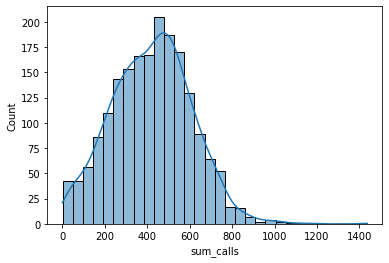

In [33]:
sns.histplot(
    data=df1[df1['tariff_name']=='smart'],
    x='sum_calls',
    kde=True,
    bins=30);

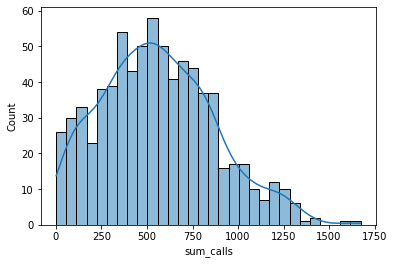

In [34]:
sns.histplot(data=df1[df1['tariff_name']=='ultra'],
             x='sum_calls',
             kde=True,
             bins=30);

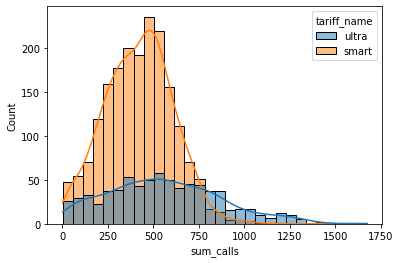

In [35]:
sns.histplot(
    data=df1,
    x='sum_calls', hue='tariff_name',
    kde=True,
    bins=30);

In [36]:
df1.groupby('tariff_name')\
  .agg({'sum_calls':['median','mean','var','std']})\
  .style.format("{:.2f}")
# расчет статистических показателей для звонков

Распределения по количеству звонков у тарифов похоже на нормальные распределения с разным стандратным отклонением и дисперсией , и соответсвенно диапазоном распределения.

Используя тариф Smart люди в месяц говорят около 420 минут, на Ultra 550 минут в месяц.
На Smart люди подходят к краю своего тарифа, а на Ultra у них остается большой запас минут. 
Среднее и медиана лежат рядом. 

### Cообщения в месяц по тарифу Ultra, Smart 

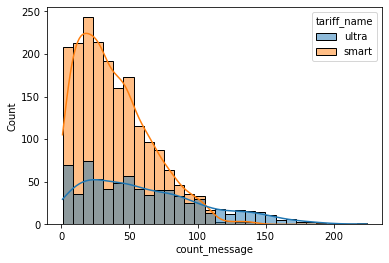

In [37]:
sns.histplot(
    data=df1,
    x='count_message', hue='tariff_name',
    kde=True,
    bins=30);

In [38]:
df1.groupby('tariff_name')\
  .agg({'count_message':['median','mean','var','std']})\
  .style.format("{:.2f}")
# расчет статистических показателей для сообщений

Смс-ки не так актуальны как звонки.

Распределение количества сообщений по тарифу Smart похоже на экспоненциальное распределение

Распределение количества сообщений по тарифу Ultra похоже на равномерное распределение

### Интернет в месяц Гб по тарифу Ultra, Smart

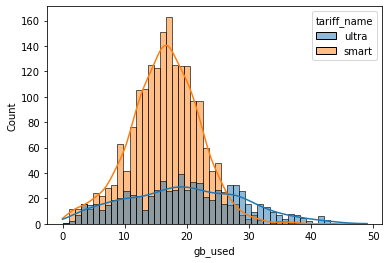

In [39]:
sns.histplot(
    data=df1,
    x='gb_used', hue='tariff_name',
    kde=True,
    bins=50);

In [40]:
df1.groupby('tariff_name')\
  .agg({'gb_used':['median','mean','var','std']})\
  .style.format("{:.2f}")
# расчет статистических показателей для интернет-трафика

Среднее и медиана довольно близки друг к другу.

На Smart абоненты выходят за пределы тарифа чаще,чем на Ultra .

На Ultra среднее значение лежит в районе 20 ГБ , то есть  в среднем абоненты имеют запас 10 ГБ, но и разброс больше.

Распределения нормальные.У тарифа Ultra больше дисперсия, соответсвенно больше диапазон распределения

## Проверка гипотез

- средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются
- средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

Пороговое значение alpha задайте самостоятельно.

Поясните:

- как вы формулировали нулевую и альтернативную гипотезы
- какой критерий использовали для проверки гипотез и почему


Будем использовать t-критерий Стьюдента, так как сравниваемые выборки независимы между собой.

Больше всего t-критерий «боится» выбросов, т.е. аномальных отклонений.

Визуализируем распределения выручки по тарифам, и диаграмму рассеяния

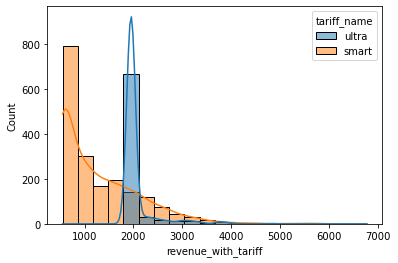

In [41]:
sns.histplot(
    data=df1,
    x='revenue_with_tariff', hue='tariff_name',
    kde=True,
    bins=20);

По Ultra в основном платят по тарифу и небольшое количество абонентов превышают тарифную плату на каждую 1000рублей 

По Smart абоненты выходят за абонентскую плату чаще, для них это как будто дело привычное.


Будем использовать t-критерий Стьюдента, так как сравниваемые выборки независимы между собой.

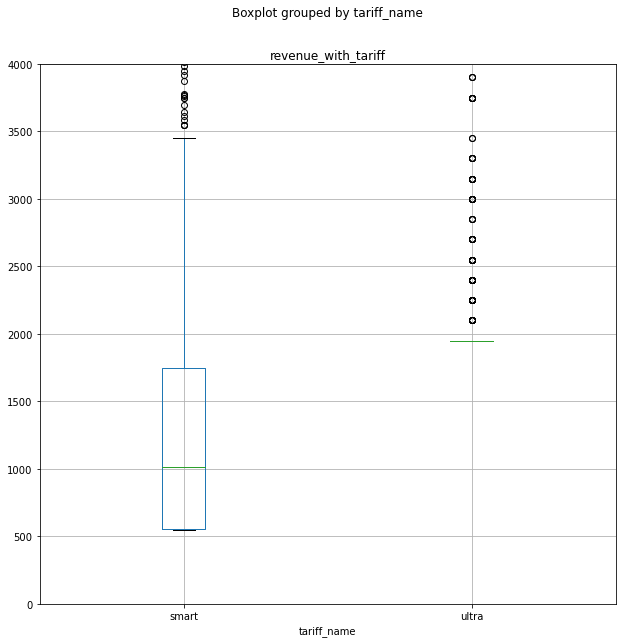

In [42]:
df1.boxplot('revenue_with_tariff', by='tariff_name', figsize=(10,10)).set_ylim(0,4000);

Выбросы однозначно присутствуют, но по тарифу Ultra на диаграмме рассеяния мало что понятно.

Сформулируем гипотезы:
 
 **H0: выручка пользователей тарифов «Ультра» и «Смарт» не различается**
 
 **H1: выручка пользователей тарифов «Ультра» и «Смарт» различается**

Нулевая гипотеза должна предполагать равенство исследуемых средних.

Примем alpha = .05 - критический уровень статистической значимости. Если p-value окажется меньше него - отвергнем гипотезу.

Используем гипотезу о равенстве средних двух генеральных совокупностей.


In [51]:
alpha =0.05

results = st.ttest_ind(                                               # применяем t тест для средних двух генер.совокупн 
df1[df1['tariff_name'] == 'ultra']['revenue_with_tariff'],
df1[df1['tariff_name'] == 'smart']['revenue_with_tariff'],
equal_var = False)
print('p-значение:',results.pvalue)                                   #дисперсии в выборках различны, equal_var = False

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 6.332685457738247e-209
Отвергаем нулевую гипотезу


### Гипотеза: средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов

Сформулируем гипотезы:

**H0: средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов**

**H1: средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов**


In [52]:
df1['city'].unique()

array(['Краснодар', 'Москва', 'Новокузнецк', 'Иваново', 'Омск', 'Уфа',
       'Томск', 'Тверь', 'Ярославль', 'Тюмень', 'Калуга', 'Саранск',
       'Иркутск', 'Череповец', 'Новосибирск', 'Брянск', 'Тольятти',
       'Нижний Тагил', 'Воронеж', 'Махачкала', 'Санкт-Петербург',
       'Сургут', 'Пенза', 'Набережные Челны', 'Самара', 'Нижний Новгород',
       'Кемерово', 'Кострома', 'Магнитогорск', 'Пермь', 'Астрахань',
       'Нижневартовск', 'Челябинск', 'Владивосток', 'Смоленск',
       'Владимир', 'Казань', 'Курган', 'Саратов', 'Севастополь', 'Рязань',
       'Екатеринбург', 'Ростов-на-Дону', 'Стерлитамак', 'Волгоград',
       'Балашиха', 'Барнаул', 'Киров', 'Вологда', 'Красноярск',
       'Чебоксары', 'Чита', 'Мурманск', 'Петрозаводск', 'Ульяновск',
       'Хабаровск', 'Ставрополь', 'Улан-Удэ', 'Тула', 'Курск', 'Якутск',
       'Химки', 'Владикавказ', 'Сочи', 'Ижевск', 'Белгород',
       'Архангельск', 'Липецк', 'Волжский', 'Тамбов', 'Калининград',
       'Новороссийск', 'Орёл', 'Грозны

In [53]:
df_moscow=df1[df1['city']=='Москва']
df_other=df1[df1['city']!='Москва']

In [54]:
alpha =0.05

results = st.ttest_ind(                                               # применяем t тест 
df_moscow['revenue_with_tariff'],
df_other['revenue_with_tariff'],
equal_var = False)
print('p-значение:', results.pvalue)                                   #дисперсии в выборках различны, equal_var = False

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.11026125741565364
Не получилось отвергнуть нулевую гипотезу


С вероятностью в 10% такой результат может быть получен случайно.

Не отличаются выручки пользователей из Москвы и других регионов.

## Общий вывод

Абоненты на разных тарифах ведут себя по-разному.

Довольно сильно и часто абоненты переплачивают на тарифе Smart, это может привести к оттоку клиентов.

    - сообщениями абоненты не особо пользуются на обоих тарифах;
    - в тарифе Smart  люди близки к своим лимитам, то на тарифе Ultra остаются большие неизрасходованные "запасы";
    - тарифы приносят разные выручки;
    - не отличаются выручки пользователей из Москвы и других регионов,значит выручка не зависит от уровня жизни клиентов,
    а возможно от их поведения/пользования услугами.

### Чек лист 

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод info())
- [x]  определены пропущенные значения 
- [x]  заполнены пропущенные значения, если нужно
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  посчитано и добавлено в таблицу: количество сделанных звонков и израсходованных минут разговора по месяцам
- [x]  посчитано и добавлено в таблицу: количество отправленных сообщений по месяцам
- [x]  посчитано и добавлено в таблицу: объем израсходованного интернет-трафика по месяцам;
- [x]  посчитано и добавлено в таблицу: помесячную выручку с каждого пользователя (вычтите бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножьте на значение из тарифного плана; прибавьте абонентскую плату, соответствующую тарифному плану)
- [x]  построены гистограммы для каждого параметра
- [x]  описано поведение клиентов оператора, исходя из выборки.(Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц?)
- [x]  посчитайно среднее количество, дисперсия и стандартное отклонение
- [x]  описано распределение
- [x]  сформулирована нулевая и альтернативная гипотезы
- [x]  Проверьте гипотезы:
- [x]      средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются;
- [x]      средняя выручка пользователи из Москвы отличается от выручки пользователей из других регионов.
- [x]  объяснить какой критерий использовали для проверки гипотез и почему.
- [x]  в каждом этапе есть выводы
- [x]  есть общий вывод